<a href="https://colab.research.google.com/github/merucode/RL/blob/93-Project-Trader-Custom_enviromnet/02_01_Reinforce_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Do List

### 23.08.14

* [X] Make df and df_render
* [X] Observation Normalizatio(distinguish ohcl with volume)
* [X] Reward(profit) is extrected from df_render which is not normalization)
  * trade_world.py is changed
* [X] Add balance information
* [X] Add more holding action  
  * trade_world.py is changed

# Install Dependency and Test

In [1]:
!git clone -b 93-Project-Trader-Custom_enviromnet https://github.com/merucode/RL.git
!cd RL && mv * ../

Cloning into 'RL'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 274 (delta 89), reused 168 (delta 82), pack-reused 80
Receiving objects: 100% (274/274), 17.19 MiB | 15.44 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [7]:
!pip install gym==0.25.2
!pip install -e gym-examples

Obtaining file:///content/gym-examples
  Preparing metadata (setup.py) ... done
  Attempting uninstall: gym-examples
    Found existing installation: gym-examples 0.0.1
    Uninstalling gym-examples-0.0.1:
      Successfully uninstalled gym-examples-0.0.1
  Running setup.py develop for gym-examples


### NOTE: After inistall gym-examples, Restart runtime

# STEP. Ready Data

In [1]:
import pandas as pd

df1 = pd.read_csv('KRW-BTC_5m_171001_200903_upbit.csv')
df2 = pd.read_csv('KRW-BTC_5m_200904_230810_upbit.csv')

df = pd.concat([df1, df2], ignore_index=True)
df = df[df.columns[1:]]
print(df.tail(3))

              open        high         low       close    volume
492909  39190000.0  39231000.0  39190000.0  39212000.0  2.929709
492910  39212000.0  39214000.0  39188000.0  39191000.0  3.407502
492911  39191000.0  39210000.0  39188000.0  39188000.0  3.884740


In [2]:
# Preporcessing df_render
df = df[:5000] #Temp : TEST
df_ohlc = df[df.columns[:4]] / 10000
df_v = df[df.columns[-1:]]
df = pd.concat([df_ohlc, df_v], axis=1)
df_render = df
print(df_render)

       open   high    low  close    volume
0     479.7  480.0  479.3  480.0  0.013444
1     479.8  479.9  479.2  479.3  0.013597
2     479.5  480.2  479.5  479.5  0.016304
3     480.1  480.2  479.5  480.1  0.017136
4     479.7  479.9  479.1  479.9  0.007615
...     ...    ...    ...    ...       ...
4995  677.1  678.9  677.1  678.9  0.001633
4996  683.3  683.3  677.9  677.9  0.002466
4997  680.0  681.1  680.0  681.1  0.001179
4998  685.0  685.0  685.0  685.0  0.001472
4999  686.6  689.7  685.6  689.7  0.003341

[5000 rows x 5 columns]


In [3]:
# # Preporcessing df
# df_ohlc = df[df.columns[:4]]
# df_ohlc_normalization = (df_ohlc - df_ohlc.mean())/df_ohlc.std()
# df_v = df[df.columns[-1:]]
# df_v_normalization =  (df_v - df_v.mean())/df_v.std()
# df = pd.concat([df_ohlc_normalization, df_v_normalization], axis=1)
# print(df)

          open      high       low     close    volume
0    -1.291353 -1.302586 -1.281931 -1.288008 -0.090467
1    -1.289980 -1.303949 -1.283314 -1.297619 -0.090258
2    -1.294099 -1.299861 -1.279164 -1.294873 -0.086560
3    -1.285861 -1.299861 -1.279164 -1.286636 -0.085424
4    -1.291353 -1.303949 -1.284697 -1.289381 -0.098428
...        ...       ...       ...       ...       ...
4995  1.419151  1.407879  1.454113  1.442674 -0.106599
4996  1.504284  1.467839  1.465179  1.428945 -0.105461
4997  1.458971  1.437859  1.494227  1.472877 -0.107219
4998  1.527626  1.491006  1.563389  1.526420 -0.106819
4999  1.549596  1.555054  1.571688  1.590946 -0.104266

[5000 rows x 5 columns]


### Check env

In [ ]:
import time
import matplotlib.pyplot as plt
import gym
import numpy as np

In [ ]:
env = gym.make("gym_examples:TradeWorld-v0", df=df, obs_len=2016)
# 5m ohlcv obs_len=2016 is mean 7 days

# single env
print(f'observation space : {env.observation_space}')
print(f'action space      : {env.action_space}')
print(f'observation shape : {env.observation_space.shape[0]}')
print(f'action shape      : {env.action_space.n}')

obs = env.reset()
action = 10
env.step(action)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


observation space : Box(0.0, inf, (10080,), float64)
action space      : Discrete(16)
observation shape : 10080
action shape      : 16


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float64, actual type: float32
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  

(array([-0.01231618, -0.01241297, -0.01223485, ..., -0.00929192,
        -0.00940871, -0.02168003], dtype=float32),
 0.03320494935282303,
 False,
 {'balance': 1000.0332049493528, 'time_step': 0, 'time_step_limit': 7968})

In [ ]:
envs = gym.vector.make("gym_examples:TradeWorld-v0", num_envs=2, df=df, obs_len=180)
obs_b = envs.reset()
actions = np.array([10, 5])
envs.step(actions)

/usr/local/lib/python3.10/dist-packages/gym/vector/vector_env.py:56: DeprecationWarning: WARN: Initializing vector env in old step API which returns one bool array instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


(array([[-1.61010718, -1.62276101, -1.59947574, ..., -1.53131783,
         -1.54626179, -0.32697502],
        [-1.61010718, -1.62276101, -1.59947574, ..., -1.53131783,
         -1.54626179, -0.32697502]]),
 array([0.02122165, 0.01673758]),
 array([False, False]),
 {'balance': array([1000.02122165, 1000.01673758]),
  '_balance': array([ True,  True])})

# STEP. Reinforce

In [3]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import numpy as np

#Device
device = device = 'cuda' if torch.cuda.is_available() else 'cpu'

#Hyperparameters
learning_rate = 0.0002
gamma         = 0.98

class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.data = []

        self.fc1 = nn.Linear(10080, 1260)
        # self.fc2 = nn.Linear(5040, 2520)
        # self.fc3 = nn.Linear(2520, 1260)
        self.fc4 = nn.Linear(1260, 16)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = F.relu(self.fc3(x))
        x = F.softmax(self.fc4(x), dim=0)
        return x

    def put_data(self, item):
        self.data.append(item)

    def train_net(self):
        R = 0
        self.optimizer.zero_grad()
        for r, prob in self.data[::-1]:
            R = r + gamma * R
            loss = -torch.log(prob + 1e-6) * R    # nan error handling : + 1e-6
            loss.backward()
        self.optimizer.step()
        self.data = []

In [4]:
# import random

# def action_eps(action, eps):
#     coin = random.random()
#     if coin < eps:
#         action_e = random.randint(1,12)
#     else:
#         action_e = action
#     return action_e

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
def main():
    env = gym.make("gym_examples:TradeWorld-v0", df=df, df_render=df_render, obs_len=2016)
    pi = Policy()
    score = 0.0
    max_score = -2000.0
    print_interval = 10
    eps = 0.5
    pi.to(device)

    for n_epi in range(100):
        s = env.reset()
        done = False

        #print(f"DEBUG: episode:{n_epi}")
        while not done:
            #print(f"DEBUG: {s.shape}")
            prob = pi(torch.from_numpy(s).float().to(device))
            #print(f"DEBUG prob: {prob}")
            m = Categorical(prob)

            a = m.sample()
            # a = action_eps(a.item(),eps)
            a = torch.tensor(a)

            s_prime, r, done, info = env.step(a.item())
            pi.put_data((r,prob[a]))
            s = s_prime
            score += r
            # print(f"DEBUG time step: {info['time_step']} / {info['time_step_limit']}")
            # print(f"DEBUG lst  inx : {info['idx_lst'] + a.item()} / {info['len_lst']}")
            #print(f"DEBUG action: {a.item()}")
            #print(f"DEBUG reward: {r}")


        pi.train_net()

        if n_epi%print_interval==0 and n_epi!=0:
            print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
            if score/print_interval > max_score:
                torch.save(pi.state_dict(), 'model_weights.pth')
                print(f"# max avg balance : {1000 + score/print_interval}, and save model_weights.pth")
                max_score = score/print_interval
            score = 0.0
        # if eps >= 0:
        #     eps = eps - 0.001

    env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
if __name__ == '__main__':
    main()

<ipython-input-4-2547e6aa259b>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a)


# of episode :10, avg score : -236.78000000000065
# max avg balance : 763.2199999999993, and save model_weights.pth
# of episode :20, avg score : -145.38999999999982
# max avg balance : 854.6100000000001, and save model_weights.pth
# of episode :30, avg score : -177.3499999999996
# of episode :40, avg score : -193.37000000000003
# of episode :50, avg score : -197.31000000000017
# of episode :60, avg score : -162.07999999999998
# of episode :70, avg score : -176.70000000000022
# of episode :80, avg score : -128.8699999999995
# max avg balance : 871.1300000000006, and save model_weights.pth
# of episode :90, avg score : -136.97999999999956


# STEP. Render

In [34]:
def model_render(env_name, **kwargs):
    env = gym.make(env_name, **kwargs)
    episode_trigger=lambda e: True  # all Episode Recode

    env = gym.wrappers.RecordVideo(env, "./video", episode_trigger=episode_trigger, video_length=100000)

    # Recode value
    balance_lst_dict = {}
    action_lst_dict = {}

    for episode in range(1):
        s = env.reset()
        done = False

        pi = Policy()
        pi.load_state_dict(torch.load('model_weights.pth'))
        pi.eval()
        pi.to(device)

        # Recode value
        score = 0
        balance_lst = []
        action_lst = []

        while not done:
            prob = pi(torch.from_numpy(s).float().to(device))
            m = Categorical(prob)
            a = m.sample()
            s_prime, r, done, info = env.step(a.item())
            done_mask = 0.0 if done else 1.0
            s = s_prime
            score += r

            balance_lst.append(info['balance'])
            action_lst.append(a.item())

        balance_lst_dict[episode] = balance_lst
        action_lst_dict[episode] = action_lst
        print(f"# of episode {episode}:, avg score : {score}")
    env.close()

    return balance_lst_dict, action_lst_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
balance_lst_dict, action_lst_dict = model_render("gym_examples:TradeWorld-v0", df=df, df_render=df_render, obs_len=2016)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `reset()` method was

# of episode 0:, avg score : -210.10000000000093


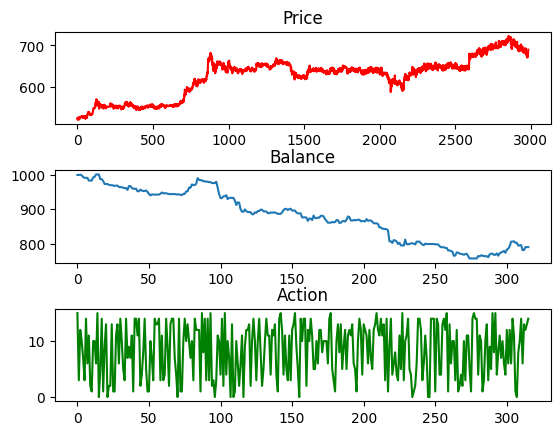

In [36]:
### BALANCE PLOT
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(311)
ax1.plot(df_render['close'][2016:].tolist(), 'r')
ax1.set_title("Price")

ax2 = fig.add_subplot(312)
ax2.plot(balance_lst_dict[0])
ax2.set_title("Balance")

ax3 = fig.add_subplot(313)
ax3.plot(action_lst_dict[0], 'g')
ax3.set_title("Action")

plt.show()

In [17]:
### VIDEO PLAYER
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./video/rl-video-episode-0.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Test Code